[]

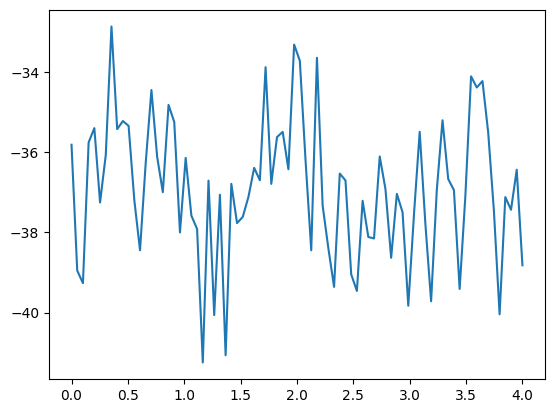

In [68]:
# We will plot some information regarding volume levels on the raw gunshot and background sound datasets
# There is concern that some audio samples are excessively loud and possibly unrealistic, which leads to incorrect classification
from pydub import AudioSegment
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

BACKGROUND_INDEX = 'data/raw_backgrounds_index.csv'
GUNSHOT_INDEX = 'data/raw_gunshots_index.csv'

max_32_signed_int = (2**31) -1 

DEBUG_PATH='/home/joao/dev/data/shotspotter/sortedBackground/159751-8-0-5.wav'

# good ones to test
# 162134-7-14-2.wav - loud jackhammer
# 159751-8-0-5.wav - not super loud ambulance

def read_from_index(path):
    result = []
    with open(path, 'r') as f:
        for line in f.readlines():
            audio = AudioSegment.from_file(DEBUG_PATH, format="wav", codec="pcm_s32le")
            #audio = AudioSegment.from_file(line.replace('\n', ''), format="wav", codec="pcm_s32le")
            #print(line)
            rate = audio.frame_rate
            samples = np.array(audio.get_array_of_samples())

            # get sample rate per 50ms
            rate_50ms = rate//20
            db_levels = []
            for i in range(int(audio.duration_seconds*rate//rate_50ms)):
                samples_50ms = samples[i*rate_50ms:i*rate_50ms+rate_50ms].astype(np.float64)

                # note: we can use max 32 signed or max of our sample as reference
                # convert to dB use RMS and dB ratio formula
                db_levels.append(20*log10(sqrt(np.mean(np.square(samples_50ms))+1)/max_32_signed_int))
                
            plt.plot(np.linspace(0, audio.duration_seconds, len(db_levels)), db_levels)
            break

    return result

read_from_index(BACKGROUND_INDEX)